In [13]:
from openvqe.vqe import VQE
import matplotlib.pyplot as plt
import numpy as np

# Variational Quantum Eigensolver (VQE) for H2 Molecule

This Jupyter Notebook demonstrates the use of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of the H4 molecule. The VQE algorithm is a hybrid quantum-classical algorithm that leverages the power of quantum computers to solve optimization problems.

## Qubit Adaptive Derivative-Assembled Pseudo-Trotter Ansatz (Fermionic ADAPT-VQE)

**Structure Description**:  
Qubit ADAPT-VQE is a quantum variational algorithm that constructs an ansatz dynamically by adding **qubit excitation operators** iteratively. Unlike Fermionic ADAPT-VQE, which uses fermionic excitation operators, Qubit ADAPT-VQE operates directly on the qubit space. It builds a wave function starting from a reference state $ |\phi_0\rangle $ and adds unitary operators selected based on the largest gradient contribution to the Hamiltonian energy. The general ansatz is written as:  
$$
|\psi_{\text{ADAPT}}\rangle = e^{\theta_k \hat{Q}_k} \cdots e^{\theta_2 \hat{Q}_2} e^{\theta_1 \hat{Q}_1} |\phi_0\rangle
$$
where $ \hat{Q}_i $ are qubit excitation operators, and $ \theta_i $ are the variational parameters optimized using a **Variational Quantum Eigensolver (VQE)**.

---

**Key Features**:
- **Adaptive Ansatz Construction**: Dynamically builds the ansatz one operator at a time, guided by the largest gradient of the Hamiltonian.
- **Qubit Operator Pool**: Operates directly in the qubit space using Pauli operators, which are more hardware-native than fermionic operators.
- **Reduced Circuit Complexity**: Tailors the ansatz to the problem, leading to more efficient quantum circuits.

---

**Advantages**:
- **Hardware-Friendly Operators**: Uses Pauli-based qubit operators, avoiding the need for fermion-to-qubit mappings like Jordan-Wigner or Bravyi-Kitaev.
- **Efficient Ansatz Growth**: Constructs a compact, problem-specific ansatz by adding only the most impactful operators, reducing unnecessary circuit depth.
- **Improved Scalability**: The iterative, gradient-based approach allows for gradual scaling to larger systems.

---

**Limitations**:
- **Gradient Computation Overhead**: Requires computing gradients for all qubit operators at each step, increasing computational cost.
- **Operator Pool Quality**: The accuracy depends on the choice of the initial pool of qubit operators, which must be sufficiently expressive for the problem.
- **Optimization Challenges**: As with other VQE-based methods, it may be prone to barren plateaus and local minima, complicating the parameter optimization process.


## Parameters

- **Molecule Symbol**: `H2`
- **Type of Generator**: `singlet_gsd`
- **Transformation**: `JW`
- **Active**: `False`

## Workflow

1. **Initialization**: Initialize the VQE algorithm with the specified parameters.
2. **Execution**: Execute the VQE algorithm to find the ground state energy.
3. **Results**: Plot the energy results and error results obtained from the VQE execution.


In [5]:
molecule_symbol = 'H2'
# In qubit ADAPT-VQE normally we choose the generalized single and double excitations
type_of_generator = 'singlet_gsd'
transform = 'JW'
active = False
opts = {
        'n_max_grads': 1,
        'optimizer': 'BFGS',
        'tolerance': 10**(-9),
        'type_conver': 'norm',
        'threshold_needed': 1e-7,
        'max_external_iterations': 10
    }

In [7]:
vqe = VQE.algorithm('qubit_adapt', molecule_symbol, type_of_generator, transform, active, opts)
vqe.execute()

 --------------------------------------------------------------------------
Running in the non active case: 
molecule symbol: H2 
molecule basis: 6-31g 
type of generator: singlet_gsd 
transform: JW 
options: {'n_max_grads': 1, 'optimizer': 'BFGS', 'tolerance': 1e-09, 'type_conver': 'norm', 'threshold_needed': 1e-07, 'max_external_iterations': 10} 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties from :
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  2
Number of qubits before active space selection =  8
Orbital energies =  [-0.59279976  0.23579258  0.77956294  1.39138474]
Nuclear repulsion =  0.70556961

/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/openvqe/common_files/molecule_factory_with_sparse.py:488: UserWarning: This guess_init_state function is deprecated.
  _, _, hf_init = get_cluster_ops_and_init_guess(
/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


reference_energy from the simulator: -1.1265450345356918
reference_energy from the analytical calculations: -1.1265450345356918
 --------------------------------------------------------------------------
                                                          
                      Start Qubit ADAPT-VQE algorithm:
                                                          
 --------------------------------------------------------------------------
                                                          
 ------------------------------------------------------
        The number of maximum gradients inserted in each iteration: 1
 ------------------------------------------------------


 --------------------------------------------------------------------------
                         Qubit ADAPT-VQE iteration:  0
 --------------------------------------------------------------------------


 ------------------------------------------------------
        Start the analytical gradient c

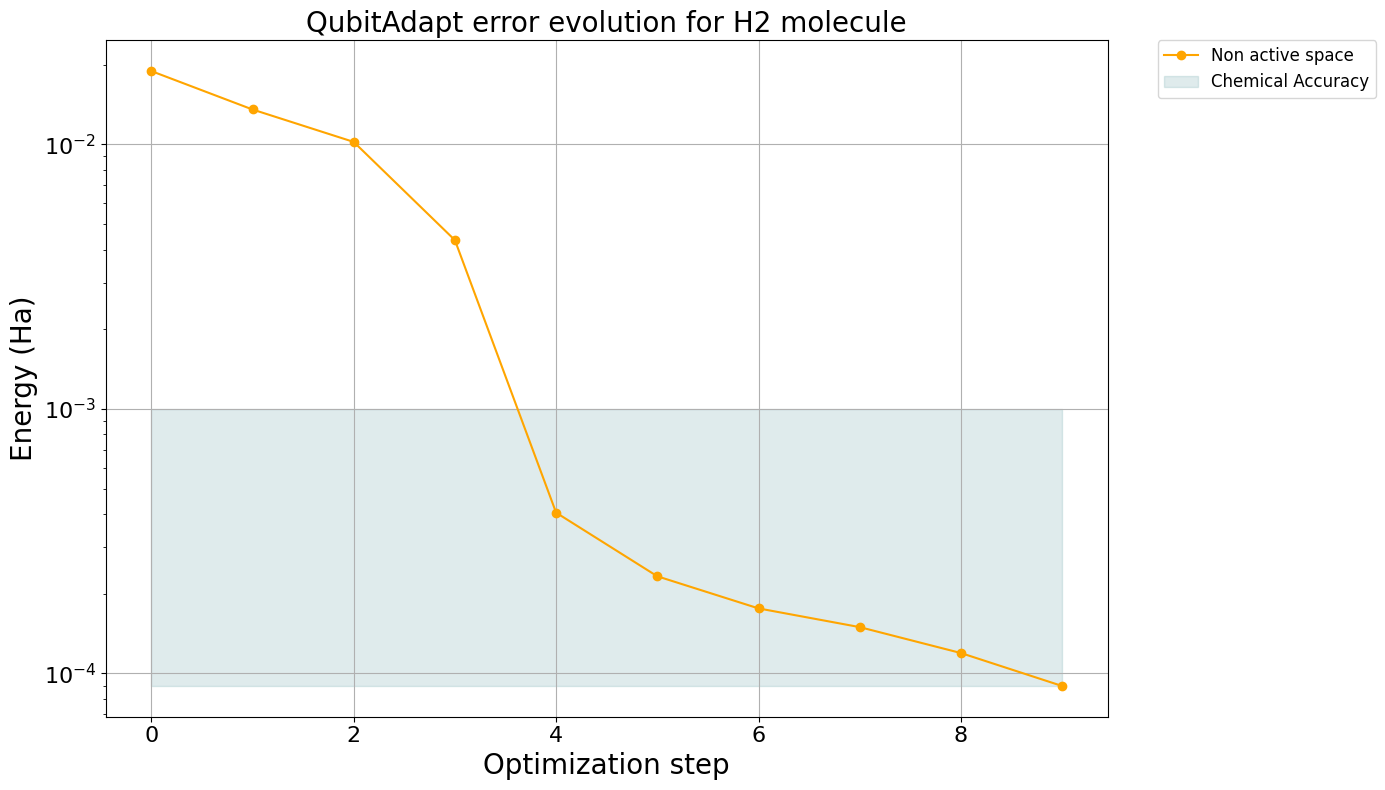

In [15]:
energies = vqe.iterations['energies']
err = np.maximum(energies - vqe.info['FCI'], 1e-16)
# Plot results with custom styles
plt.figure(figsize=(14, 8))  # Larger plot size
plt.plot(
    err,
    "-o",  # Line style with circle markers
    color="orange",  # Use custom color
    label=f"Non active space"
)
plt.fill_between(
    np.arange(0, len(energies)), 
    min(err), 
    1e-3, 
    color="cadetblue", 
    alpha=0.2, 
    interpolate=True, 
    label="Chemical Accuracy"
)
plt.yscale('log')
plt.xlabel("Optimization step", fontsize=20)
plt.ylabel("Energy (Ha)", fontsize=20)
plt.xticks(fontsize=16)  # Set font size for x-axis tick labels
plt.yticks(fontsize=16) 

# Move the legend box outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.grid()
plt.title(f"{type(vqe.algorithm).__name__} error evolution for {vqe.molecule_symbol} molecule", fontsize=20)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()